In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')

In [ ]:
print(data.head())
print(data.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 6)


In [ ]:
data['Date']=pd.to_datetime(data['Date'])                 #Convert Date column to datetime objects

data['year']=data['Date'].dt.year                          #Extract features from datetime
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day
print(data['year'])
print(data['month'])
print(data['day'])

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
1253    2016
1254    2016
1255    2016
1256    2016
1257    2016
Name: year, Length: 1258, dtype: int32
0        1
1        1
2        1
3        1
4        1
        ..
1253    12
1254    12
1255    12
1256    12
1257    12
Name: month, Length: 1258, dtype: int32
0        3
1        4
2        5
3        6
4        9
        ..
1253    23
1254    27
1255    28
1256    29
1257    30
Name: day, Length: 1258, dtype: int32


In [ ]:
features = ['year','month','day']                   #if we take more features - many to one
x=data[features]                                    #if we take any one feature - one to one
y=data['Open']            #Assume 'open' column as the column to be predicted

In [ ]:
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))            #since we dont know number of rows to be predicted take it as -1, column is only one (OPEN) hence 1

In [ ]:
#Create sequences for RNN
timesteps = 50                   #how many value we take to predict
x_sequences = []
y_sequences = []

                 #50           #1258
for i in range(timesteps, len(x_scaled)):                        #taking 0 to 49 rows to predict 50th row                i=50 in first iteration   i=51 for next
    x_sequences.append(x_scaled[i-timesteps:i])                            #[50-50:50]=[0:50]
    y_sequences.append(y_scaled[i])

x_sequences, y_sequences = np.array(x_sequences), np.array(y_sequences)              #converting the x_seq and y_seq LISTS into ARRAY

x_train, x_test, y_train, y_test = train_test_split(x_sequences, y_sequences, test_size=0.2, random_state=0)    #to let the data go in sequential manner, random_state=90

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(50,3), return_sequences=True))    #return sequence used to store 50th sequence to predict 51th sequence
model.add(Dropout(0.2))                                                                   #Dropout is optional
model.add(SimpleRNN(50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50))
model.add(Dense(1, activation='linear'))                    # output layer

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1)              #Train the model


Epoch 1/10
97/97 [==============================] - 16s 60ms/step - loss: 0.1474 - mse: 0.1474
Epoch 2/10
97/97 [==============================] - 5s 49ms/step - loss: 0.0483 - mse: 0.0483
Epoch 3/10
97/97 [==============================] - 6s 67ms/step - loss: 0.0317 - mse: 0.0317
Epoch 4/10
97/97 [==============================] - 5s 50ms/step - loss: 0.0253 - mse: 0.0253
Epoch 5/10
97/97 [==============================] - 5s 47ms/step - loss: 0.0201 - mse: 0.0201
Epoch 6/10
97/97 [==============================] - 9s 97ms/step - loss: 0.0144 - mse: 0.0144
Epoch 7/10
97/97 [==============================] - 6s 60ms/step - loss: 0.0140 - mse: 0.0140
Epoch 8/10
97/97 [==============================] - 5s 47ms/step - loss: 0.0114 - mse: 0.0114
Epoch 9/10
97/97 [==============================] - 6s 61ms/step - loss: 0.0117 - mse: 0.0117
Epoch 10/10
97/97 [==============================] - 5s 55ms/step - loss: 0.0081 - mse: 0.0081


In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(50,3), return_sequences=True))    #return sequence used to store 50th sequence to predict 51th sequence
#model.add(Dropout(0.2))                                                                   #Dropout is optional
model.add(SimpleRNN(50, activation='tanh', return_sequences=True))
#model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh', return_sequences=True))
#model.add(Dropout(0.2))
model.add(SimpleRNN(50))
model.add(Dense(1, activation='linear'))                    # output layer

model.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['mse'])

model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1)              #Train the model


Epoch 1/10
97/97 [==============================] - 9s 57ms/step - loss: 0.3953 - mse: 0.3953
Epoch 2/10
97/97 [==============================] - 5s 51ms/step - loss: 0.3132 - mse: 0.3132
Epoch 3/10
97/97 [==============================] - 4s 41ms/step - loss: 0.2610 - mse: 0.2610
Epoch 4/10
97/97 [==============================] - 5s 52ms/step - loss: 0.2229 - mse: 0.2229
Epoch 5/10
97/97 [==============================] - 6s 58ms/step - loss: 0.1918 - mse: 0.1918
Epoch 6/10
97/97 [==============================] - 4s 44ms/step - loss: 0.1658 - mse: 0.1658
Epoch 7/10
97/97 [==============================] - 5s 49ms/step - loss: 0.1433 - mse: 0.1433
Epoch 8/10
97/97 [==============================] - 6s 64ms/step - loss: 0.1244 - mse: 0.1244
Epoch 9/10
97/97 [==============================] - 4s 45ms/step - loss: 0.1079 - mse: 0.1079
Epoch 10/10
97/97 [==============================] - 5s 49ms/step - loss: 0.0936 - mse: 0.0936


In [ ]:
#vanilla rnn
from keras.layers import Dropout
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(50,3), return_sequences=True))    #return sequence used to store 50th sequence to predict 51th sequence
model.add(Dense(1, activation='linear'))                    # output layer

model.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['mse'])

model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
97/97 [==============================] - 2s 12ms/step - loss: 0.7151 - mse: 0.7151
Epoch 2/10
97/97 [==============================] - 1s 12ms/step - loss: 0.6841 - mse: 0.6841
Epoch 3/10
97/97 [==============================] - 2s 16ms/step - loss: 0.6523 - mse: 0.6523
Epoch 4/10
97/97 [==============================] - 2s 23ms/step - loss: 0.6204 - mse: 0.6204
Epoch 5/10
97/97 [==============================] - 2s 22ms/step - loss: 0.5886 - mse: 0.5886
Epoch 6/10
97/97 [==============================] - 2s 16ms/step - loss: 0.5572 - mse: 0.5572
Epoch 7/10
97/97 [==============================] - 1s 14ms/step - loss: 0.5261 - mse: 0.5261
Epoch 8/10
97/97 [==============================] - 1s 14ms/step - loss: 0.4957 - mse: 0.4957
Epoch 9/10
97/97 [==============================] - 1s 12ms/step - loss: 0.4657 - mse: 0.4657
Epoch 10/10
97/97 [==============================] - 1s 12ms/step - loss: 0.4363 - mse: 0.4363


In [ ]:
y_pred_scaled = model.predict(x_test)                           #we get dim error if we run after vanilla rnn
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_true = scaler.inverse_transform(y_test)

8/8 [==============================] - 2s 38ms/step


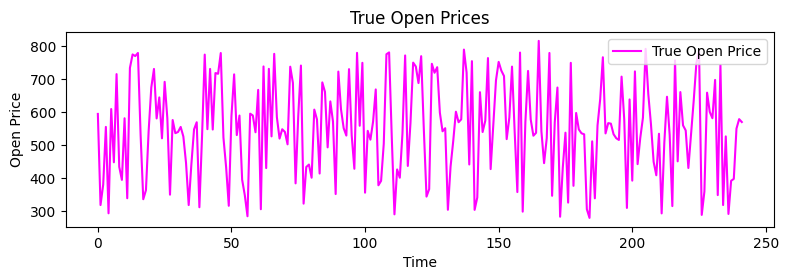

In [ ]:
plt.figure(figsize=(8,5))

#subplot for true open prices
plt.subplot(2,1,1)
plt.plot(y_test_true, label='True Open Price', color='magenta')
plt.title('True Open Prices')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()

#Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


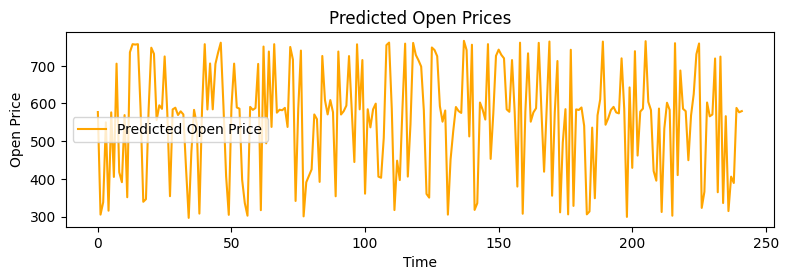

In [ ]:
plt.figure(figsize=(8,5))

#subplot for true open prices
plt.subplot(2,1,2)
plt.plot(y_pred, label='Predicted Open Price', color='orange')
plt.title('Predicted Open Prices')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()

#Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

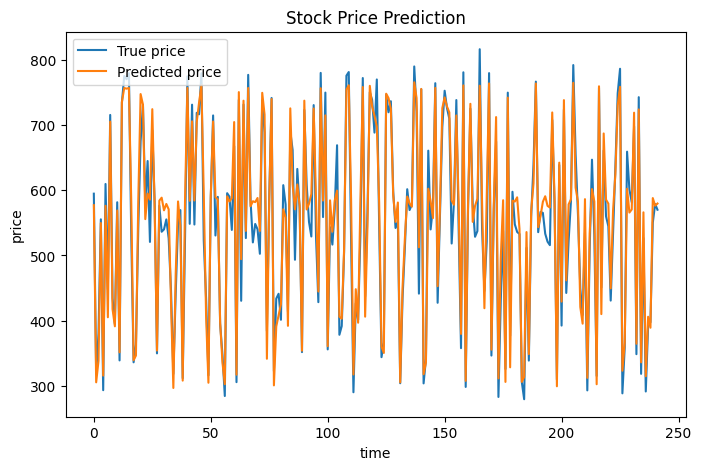

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_test_true, label='True price')
plt.plot(y_pred, label='Predicted price')
plt.title('Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show

LSTM

In [ ]:
#Building the vanilla LSTM model
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(timesteps,3)))
model.add(Dropout(0,2))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
97/97 [==============================] - 7s 32ms/step - loss: 0.0331 - mse: 0.0331
Epoch 2/10
97/97 [==============================] - 3s 33ms/step - loss: 0.0072 - mse: 0.0072
Epoch 3/10
97/97 [==============================] - 2s 24ms/step - loss: 0.0074 - mse: 0.0074
Epoch 4/10
97/97 [==============================] - 2s 22ms/step - loss: 0.0072 - mse: 0.0072
Epoch 5/10
97/97 [==============================] - 2s 23ms/step - loss: 0.0071 - mse: 0.0071
Epoch 6/10
97/97 [==============================] - 2s 23ms/step - loss: 0.0070 - mse: 0.0070
Epoch 7/10
97/97 [==============================] - 3s 27ms/step - loss: 0.0069 - mse: 0.0069
Epoch 8/10
97/97 [==============================] - 3s 31ms/step - loss: 0.0069 - mse: 0.0069
Epoch 9/10
97/97 [==============================] - 3s 27ms/step - loss: 0.0065 - mse: 0.0065
Epoch 10/10
97/97 [==============================] - 2s 21ms/step - loss: 0.0067 - mse: 0.0067


In [ ]:
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_true = scaler.inverse_transform(y_test)

8/8 [==============================] - 2s 12ms/step


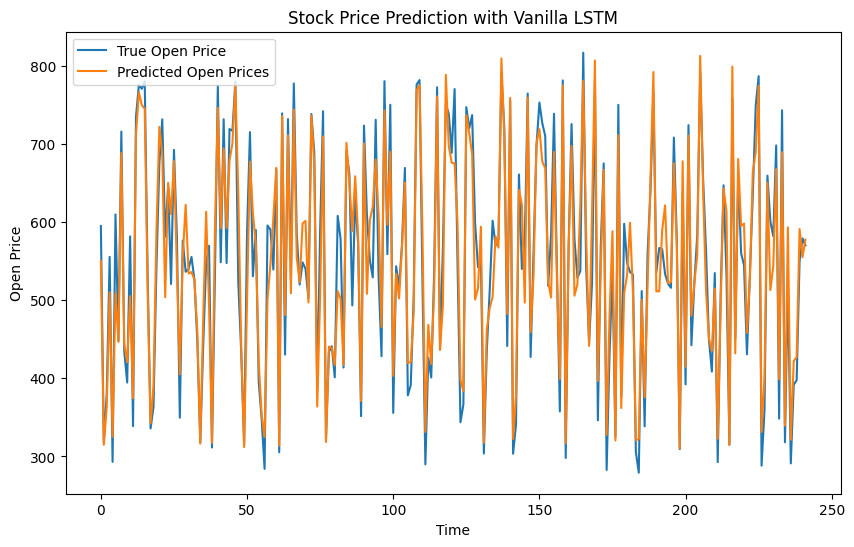

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test_true, label='True Open Price')
plt.plot(y_pred, label='Predicted Open Prices')
plt.title('Stock Price Prediction with Vanilla LSTM')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()


In [ ]:
#Stacked LSTM
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(50,3), return_sequences=True))
#model.add(LSTM(0.2))
model.add(LSTM(50, activation='tanh', return_sequences=True))
#model.add(LSTM(0.2))
model.add(LSTM(50, activation='tanh', return_sequences=True))
#model.add(LSTM(0.2))
model.add(LSTM(50))
model.add(Dense(1, activation='linear'))                    # output layer

model.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['mse'])

model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
97/97 [==============================] - 21s 126ms/step - loss: 0.3161 - mse: 0.3161
Epoch 2/10
97/97 [==============================] - 17s 181ms/step - loss: 0.3019 - mse: 0.3019
Epoch 3/10
97/97 [==============================] - 15s 155ms/step - loss: 0.2874 - mse: 0.2874
Epoch 4/10
97/97 [==============================] - 12s 125ms/step - loss: 0.2725 - mse: 0.2725
Epoch 5/10
97/97 [==============================] - 10s 105ms/step - loss: 0.2570 - mse: 0.2570
Epoch 6/10
97/97 [==============================] - 9s 96ms/step - loss: 0.2410 - mse: 0.2410
Epoch 7/10
97/97 [==============================] - 11s 119ms/step - loss: 0.2243 - mse: 0.2243
Epoch 8/10
97/97 [==============================] - 10s 101ms/step - loss: 0.2070 - mse: 0.2070
Epoch 9/10
97/97 [==============================] - 12s 119ms/step - loss: 0.1890 - mse: 0.1890
Epoch 10/10
97/97 [==============================] - 11s 111ms/step - loss: 0.1706 - mse: 0.1706


In [ ]:
#Bi-directional LSTM
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh', input_shape=(50,3), return_sequences=True)))
#model.add(LSTM(0.2))
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True)))
#model.add(LSTM(0.2))
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True)))
#model.add(LSTM(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1, activation='linear'))                    # output layer

model.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['mse'])

model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
97/97 [==============================] - 36s 169ms/step - loss: 0.3168 - mse: 0.3168
Epoch 2/10
97/97 [==============================] - 18s 191ms/step - loss: 0.2886 - mse: 0.2886
Epoch 3/10
97/97 [==============================] - 17s 176ms/step - loss: 0.2602 - mse: 0.2602
Epoch 4/10
97/97 [==============================] - 18s 183ms/step - loss: 0.2316 - mse: 0.2316
Epoch 5/10
97/97 [==============================] - 17s 169ms/step - loss: 0.2029 - mse: 0.2029
Epoch 6/10
97/97 [==============================] - 16s 167ms/step - loss: 0.1746 - mse: 0.1746
Epoch 7/10
97/97 [==============================] - 17s 170ms/step - loss: 0.1472 - mse: 0.1472
Epoch 8/10
97/97 [==============================] - 17s 177ms/step - loss: 0.1213 - mse: 0.1213
Epoch 9/10
97/97 [==============================] - 16s 165ms/step - loss: 0.0975 - mse: 0.0975
Epoch 10/10
97/97 [==============================] - 19s 194ms/step - loss: 0.0769 - mse: 0.0769
